In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
import numpy as np

In [1]:
import pandas as pd

### Load Data

In [5]:
df=pd.read_csv("Market Prices M_NG F2.csv")

In [6]:
df_2025=df[df["Year"]==2025]

In [7]:
df_2025.head()

,Year,Month,Day,Period,MO West Gen Mkt,Metro Gen Mkt,Build Gen Mkt,KS Central Gen Mkt,Metro Gen HAWTHORN Mkt,Metro Gen IATAN Mkt,...,KS Central Gen LEC Mkt,KS Central Gen JEC Mkt,MO West JEC Gen Mkt,MO West Load Mkt,Metro Load Mkt,KS Central Load Mkt,KS Central Gen Wind Mkt,Build Gen Wind Mkt,Metro Gen Wind Mkt,MO West Gen Wind Mkt
8784,2025,1,1,1,-27.0,-31.4,-31.4,-29.8,-39.5,-33.7,...,-32.9,-31.9,-31.9,-22.1,-32.9,-28.3,-29.7,-29.7,-29.7,-29.7
8785,2025,1,1,2,-22.8,-30.8,-30.8,-26.8,-42.9,-35.0,...,-34.4,-31.3,-31.3,-24.2,-35.6,-28.1,-27.6,-27.6,-27.6,-27.6
8786,2025,1,1,3,-27.4,-28.6,-28.6,-25.3,-40.3,-32.9,...,-32.3,-29.4,-29.4,-22.7,-33.5,-26.0,-25.9,-25.9,-25.9,-25.9
8787,2025,1,1,4,-29.0,-24.8,-24.8,-22.7,-38.0,-30.3,...,-29.5,-26.7,-26.7,-21.0,-31.2,-23.0,-23.9,-23.9,-23.9,-23.9
8788,2025,1,1,5,-26.5,-17.0,-17.0,-16.9,-23.6,-25.2,...,-21.4,-19.9,-19.9,-11.4,-18.9,-15.6,-17.7,-17.7,-17.7,-17.7


In [7]:
df_2025.shape

(8760, 23)

In [8]:
df_2025.to_csv("MrktPrices2025.csv", index=False)

In [9]:
df_2025.reset_index(drop=True, inplace=True)

In [8]:
df_2026 =df[df["Year"]==2026]

In [9]:
df_2026.shape

(8760, 23)

In [10]:
df_2026.head()

,Year,Month,Day,Period,MO West Gen Mkt,Metro Gen Mkt,Build Gen Mkt,KS Central Gen Mkt,Metro Gen HAWTHORN Mkt,Metro Gen IATAN Mkt,...,KS Central Gen LEC Mkt,KS Central Gen JEC Mkt,MO West JEC Gen Mkt,MO West Load Mkt,Metro Load Mkt,KS Central Load Mkt,KS Central Gen Wind Mkt,Build Gen Wind Mkt,Metro Gen Wind Mkt,MO West Gen Wind Mkt
17544,2026,1,1,1,-27.0,-31.4,-31.4,-29.8,-39.5,-33.7,...,-32.9,-31.9,-31.9,-22.1,-32.9,-28.3,-29.7,-29.7,-29.7,-29.7
17545,2026,1,1,2,-22.8,-30.8,-30.8,-26.8,-42.9,-35.0,...,-34.4,-31.3,-31.3,-24.2,-35.6,-28.1,-27.6,-27.6,-27.6,-27.6
17546,2026,1,1,3,-27.4,-28.6,-28.6,-25.3,-40.3,-32.9,...,-32.3,-29.4,-29.4,-22.7,-33.5,-26.0,-25.9,-25.9,-25.9,-25.9
17547,2026,1,1,4,-29.0,-24.8,-24.8,-22.7,-38.0,-30.3,...,-29.5,-26.7,-26.7,-21.0,-31.2,-23.0,-23.9,-23.9,-23.9,-23.9
17548,2026,1,1,5,-26.5,-17.0,-17.0,-16.9,-23.6,-25.2,...,-21.4,-19.9,-19.9,-11.4,-18.9,-15.6,-17.7,-17.7,-17.7,-17.7


In [40]:
df_2026.reset_index(drop=True, inplace=True)

### Standard Scaler

In [12]:
scaler25 = StandardScaler()

In [13]:
scaled25=scaler25.fit_transform(df_2025[["MO West Gen Mkt"]])

In [14]:
scaler25.mean_

array([15.41619521])

In [15]:
mean2025 = df_2025["MO West Gen Mkt"].mean()
mean2026 = df_2026["MO West Gen Mkt"].mean()

In [16]:
print(mean2025,mean2026)

15.416195205479452 16.63041894977169


In [17]:
std = scaler25.scale_

In [18]:
inv26 = scaled25 * std + mean2026

In [19]:
df_inv26 = pd.DataFrame(inv26, columns = ["Prices"])

In [20]:
df_inv26.head()

,Prices
0,-25.785776
1,-21.585776
2,-26.185776
3,-27.785776
4,-25.285776


<Axes: >

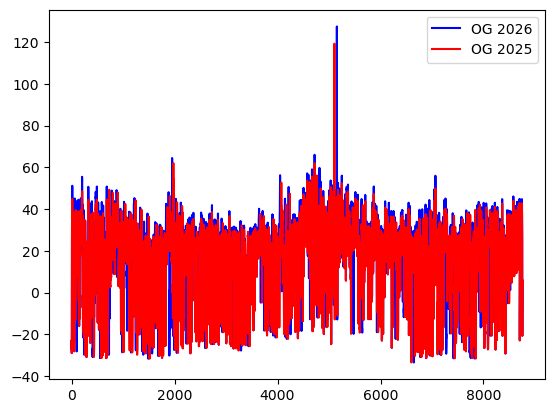

In [46]:
ax = df_2026[["MO West Gen Mkt"]].plot(kind='line', y='MO West Gen Mkt', color='blue', label='OG 2026')
df_2025[["MO West Gen Mkt"]].plot(kind='line', y='MO West Gen Mkt', color='red', label='OG 2025', ax=ax)

<Axes: >

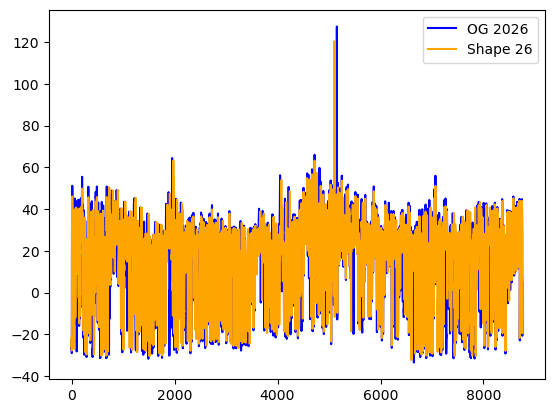

In [48]:
ax2 = df_2026[["MO West Gen Mkt"]].plot(kind='line', y='MO West Gen Mkt', color='blue', label='OG 2026')
df_inv26.plot(kind='line', y='Prices', color='orange', label='Shape 26', ax=ax2)

### Frequency Domain Viz w/ FFT

In [ ]:
#FREQUENCY ANALYSIS WITH FFT
#source: https://realpython.com/python-scipy-fft/

In [12]:
MOW_25=df_2025["MO West Gen Mkt"].to_numpy()
type(MOW_25)

numpy.ndarray

In [13]:
MOW_25.size

8760

In [18]:
#FFT with freq set to cycles per hour
#working on unnormalized/unstandardized data

In [ ]:
yf_hour = rfft(MOW_25)
xf_hour= rfftfreq(8760)
plt.plot(xf_hour, np.abs(yf_hour))
plt.show()
#this shows cycles per day I think

In [ ]:
#FFT with freq set to cycles per hour
yf_day = rfft(MOW_25)
xf_day= rfftfreq(8760,24)
plt.plot(xf_day, np.abs(yf_day))
plt.show()

In [ ]:
#FFT with freq set to cycles per hour
yf_month = rfft(MOW_25)
xf_month= rfftfreq(8760,720)
plt.plot(xf_month, np.abs(yf_month))
plt.show()

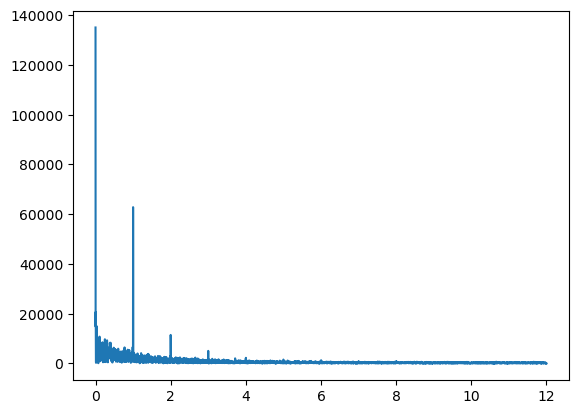

In [23]:
inverse_step = 1/24
yf_inv = rfft(MOW_25)
xf_inv= rfftfreq(8760, d=inverse_step)
plt.plot(xf_inv, np.abs(yf_inv))
plt.show()
#this shows cycles per day I think
#Sampling rate is 24hrs/day
#our length is 8760hrs
# so this gives cycles per day but I don't think that's right CHECK THIS

In [ ]:
# yeah I don't actually understand what's going on with the window/sample spacing parameters. 
# need to review fourier transform 

### Pandas TimeSeries Setup

In [ ]:
#https://stackoverflow.com/questions/36416725/python-pandas-converting-date-and-hour-integers-to-datetime

In [11]:
df_2025.head()

,Year,Month,Day,Period,MO West Gen Mkt,Metro Gen Mkt,Build Gen Mkt,KS Central Gen Mkt,Metro Gen HAWTHORN Mkt,Metro Gen IATAN Mkt,...,KS Central Gen LEC Mkt,KS Central Gen JEC Mkt,MO West JEC Gen Mkt,MO West Load Mkt,Metro Load Mkt,KS Central Load Mkt,KS Central Gen Wind Mkt,Build Gen Wind Mkt,Metro Gen Wind Mkt,MO West Gen Wind Mkt
0,2025,1,1,1,-27.0,-31.4,-31.4,-29.8,-39.5,-33.7,...,-32.9,-31.9,-31.9,-22.1,-32.9,-28.3,-29.7,-29.7,-29.7,-29.7
1,2025,1,1,2,-22.8,-30.8,-30.8,-26.8,-42.9,-35.0,...,-34.4,-31.3,-31.3,-24.2,-35.6,-28.1,-27.6,-27.6,-27.6,-27.6
2,2025,1,1,3,-27.4,-28.6,-28.6,-25.3,-40.3,-32.9,...,-32.3,-29.4,-29.4,-22.7,-33.5,-26.0,-25.9,-25.9,-25.9,-25.9
3,2025,1,1,4,-29.0,-24.8,-24.8,-22.7,-38.0,-30.3,...,-29.5,-26.7,-26.7,-21.0,-31.2,-23.0,-23.9,-23.9,-23.9,-23.9
4,2025,1,1,5,-26.5,-17.0,-17.0,-16.9,-23.6,-25.2,...,-21.4,-19.9,-19.9,-11.4,-18.9,-15.6,-17.7,-17.7,-17.7,-17.7


In [12]:
df_2025['Date']=pd.to_datetime(df_2025[['Year','Month', 'Day']])

C:\Users\U1231034\AppData\Local\Temp\ipykernel_11832\1786422922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025['Date']=pd.to_datetime(df_2025[['Year','Month', 'Day']])


In [13]:
df_2025.head()

,Year,Month,Day,Period,MO West Gen Mkt,Metro Gen Mkt,Build Gen Mkt,KS Central Gen Mkt,Metro Gen HAWTHORN Mkt,Metro Gen IATAN Mkt,...,KS Central Gen JEC Mkt,MO West JEC Gen Mkt,MO West Load Mkt,Metro Load Mkt,KS Central Load Mkt,KS Central Gen Wind Mkt,Build Gen Wind Mkt,Metro Gen Wind Mkt,MO West Gen Wind Mkt,Date
0,2025,1,1,1,-27.0,-31.4,-31.4,-29.8,-39.5,-33.7,...,-31.9,-31.9,-22.1,-32.9,-28.3,-29.7,-29.7,-29.7,-29.7,2025-01-01
1,2025,1,1,2,-22.8,-30.8,-30.8,-26.8,-42.9,-35.0,...,-31.3,-31.3,-24.2,-35.6,-28.1,-27.6,-27.6,-27.6,-27.6,2025-01-01
2,2025,1,1,3,-27.4,-28.6,-28.6,-25.3,-40.3,-32.9,...,-29.4,-29.4,-22.7,-33.5,-26.0,-25.9,-25.9,-25.9,-25.9,2025-01-01
3,2025,1,1,4,-29.0,-24.8,-24.8,-22.7,-38.0,-30.3,...,-26.7,-26.7,-21.0,-31.2,-23.0,-23.9,-23.9,-23.9,-23.9,2025-01-01
4,2025,1,1,5,-26.5,-17.0,-17.0,-16.9,-23.6,-25.2,...,-19.9,-19.9,-11.4,-18.9,-15.6,-17.7,-17.7,-17.7,-17.7,2025-01-01


In [15]:
df_2025['DateTime']=df_2025.Date+df.Period.astype('timedelta64[h]')

C:\Users\U1231034\AppData\Local\Temp\ipykernel_11832\2736859399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025['DateTime']=df_2025.Date+df.Period.astype('timedelta64[h]')


In [18]:
df_2025.DateTime.head(30)

0    2025-01-01 01:00:00
1    2025-01-01 02:00:00
2    2025-01-01 03:00:00
3    2025-01-01 04:00:00
4    2025-01-01 05:00:00
5    2025-01-01 06:00:00
6    2025-01-01 07:00:00
7    2025-01-01 08:00:00
8    2025-01-01 09:00:00
9    2025-01-01 10:00:00
10   2025-01-01 11:00:00
11   2025-01-01 12:00:00
12   2025-01-01 13:00:00
13   2025-01-01 14:00:00
14   2025-01-01 15:00:00
15   2025-01-01 16:00:00
16   2025-01-01 17:00:00
17   2025-01-01 18:00:00
18   2025-01-01 19:00:00
19   2025-01-01 20:00:00
20   2025-01-01 21:00:00
21   2025-01-01 22:00:00
22   2025-01-01 23:00:00
23   2025-01-02 00:00:00
24   2025-01-02 01:00:00
25   2025-01-02 02:00:00
26   2025-01-02 03:00:00
27   2025-01-02 04:00:00
28   2025-01-02 05:00:00
29   2025-01-02 06:00:00
Name: DateTime, dtype: datetime64[ns]

In [19]:
df_2025.set_index('DateTime', inplace=True)

In [20]:
df_2025.head()

,Year,Month,Day,Period,MO West Gen Mkt,Metro Gen Mkt,Build Gen Mkt,KS Central Gen Mkt,Metro Gen HAWTHORN Mkt,Metro Gen IATAN Mkt,...,KS Central Gen JEC Mkt,MO West JEC Gen Mkt,MO West Load Mkt,Metro Load Mkt,KS Central Load Mkt,KS Central Gen Wind Mkt,Build Gen Wind Mkt,Metro Gen Wind Mkt,MO West Gen Wind Mkt,Date
DateTime,,,,,,,,,,,,,,,,,,,,,
2025-01-01 01:00:00,2025,1,1,1,-27.0,-31.4,-31.4,-29.8,-39.5,-33.7,...,-31.9,-31.9,-22.1,-32.9,-28.3,-29.7,-29.7,-29.7,-29.7,2025-01-01
2025-01-01 02:00:00,2025,1,1,2,-22.8,-30.8,-30.8,-26.8,-42.9,-35.0,...,-31.3,-31.3,-24.2,-35.6,-28.1,-27.6,-27.6,-27.6,-27.6,2025-01-01
2025-01-01 03:00:00,2025,1,1,3,-27.4,-28.6,-28.6,-25.3,-40.3,-32.9,...,-29.4,-29.4,-22.7,-33.5,-26.0,-25.9,-25.9,-25.9,-25.9,2025-01-01
2025-01-01 04:00:00,2025,1,1,4,-29.0,-24.8,-24.8,-22.7,-38.0,-30.3,...,-26.7,-26.7,-21.0,-31.2,-23.0,-23.9,-23.9,-23.9,-23.9,2025-01-01
2025-01-01 05:00:00,2025,1,1,5,-26.5,-17.0,-17.0,-16.9,-23.6,-25.2,...,-19.9,-19.9,-11.4,-18.9,-15.6,-17.7,-17.7,-17.7,-17.7,2025-01-01


In [22]:
df_2025.drop(columns=['Year', 'Month','Day','Period','Date'], inplace=True)
df_2025.head()

C:\Users\U1231034\AppData\Local\Temp\ipykernel_11832\563112788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025.drop(columns=['Year', 'Month','Day','Period','Date'], inplace=True)


,MO West Gen Mkt,Metro Gen Mkt,Build Gen Mkt,KS Central Gen Mkt,Metro Gen HAWTHORN Mkt,Metro Gen IATAN Mkt,MO West Gen IATAN Mkt,Metro Gen LAC Mkt,KS Central Gen LAC Mkt,KS Central Gen LEC Mkt,KS Central Gen JEC Mkt,MO West JEC Gen Mkt,MO West Load Mkt,Metro Load Mkt,KS Central Load Mkt,KS Central Gen Wind Mkt,Build Gen Wind Mkt,Metro Gen Wind Mkt,MO West Gen Wind Mkt
DateTime,,,,,,,,,,,,,,,,,,,
2025-01-01 01:00:00,-27.0,-31.4,-31.4,-29.8,-39.5,-33.7,-33.7,-31.9,-31.9,-32.9,-31.9,-31.9,-22.1,-32.9,-28.3,-29.7,-29.7,-29.7,-29.7
2025-01-01 02:00:00,-22.8,-30.8,-30.8,-26.8,-42.9,-35.0,-35.0,-30.9,-30.9,-34.4,-31.3,-31.3,-24.2,-35.6,-28.1,-27.6,-27.6,-27.6,-27.6
2025-01-01 03:00:00,-27.4,-28.6,-28.6,-25.3,-40.3,-32.9,-32.9,-28.8,-28.8,-32.3,-29.4,-29.4,-22.7,-33.5,-26.0,-25.9,-25.9,-25.9,-25.9
2025-01-01 04:00:00,-29.0,-24.8,-24.8,-22.7,-38.0,-30.3,-30.3,-24.7,-24.7,-29.5,-26.7,-26.7,-21.0,-31.2,-23.0,-23.9,-23.9,-23.9,-23.9
2025-01-01 05:00:00,-26.5,-17.0,-17.0,-16.9,-23.6,-25.2,-25.2,-15.6,-15.6,-21.4,-19.9,-19.9,-11.4,-18.9,-15.6,-17.7,-17.7,-17.7,-17.7


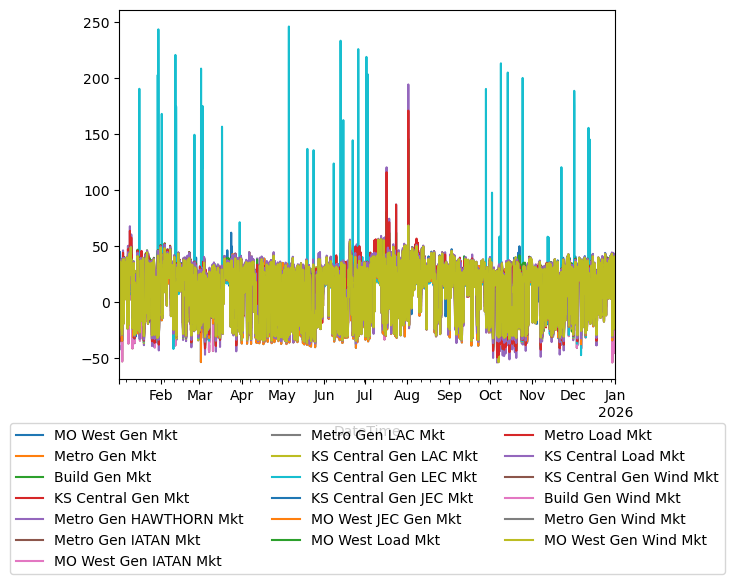

In [27]:
ax = df_2025.plot()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.show()

Observations: All prices follow a similar pattern except "KS Cenral Gen LEc Mkt"

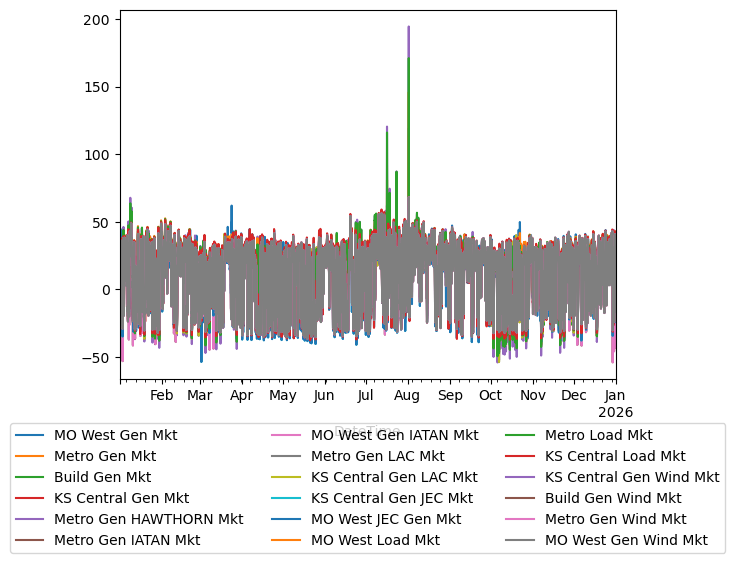

In [29]:
ax2=df_2025.drop(columns="KS Central Gen LEC Mkt").plot()
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.show()

observations: big peaks in late july. data has some seasonality, some locations are more volatile than others

In [30]:
#Look for trends
#we should stop here and switch to the SPP node prices, because Evergy prices are confidential

In [ ]:
#TODO

#EXPPLORATION
#do the prices follow a nomral dist?
#do the prices follow a nomral dist when grouped by month?
#whats the mean square error for a month across the years? 
#alaysis of variance
#negative price historgram

#SHAPING
#standarization
#normalization
#comparison statistics
#deviation between OG 2025 and OG 2026- Mean Squared Error
#deviation between OG Shaped 2026 and OG 2026
#hist of negative prices
#decomposition of time series and then reapply the different levels to new mean?

#REGRESSION
#preprocessing: label prices as peak/off peak: logistic regression or discretization or 
# feature extraction? peak/off peak prices, inflection point price goes from increasing to decresing

#FEATURE ENGINEERING?

In [ ]:
#Test out different regression methods